In [1]:
pip install nltk

categorize articles about stocks,cooking,apple stocks etc.... Gensim  is used for TOPIC MODELING

In [2]:
!pip install gensim

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical


In [4]:
stock_df=pd.read_csv('stock_sentiment.csv')
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
stock_df.info()
# 5791 entries which are not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [6]:
stock_df.isnull().sum()
#no null entries

Text         0
Sentiment    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



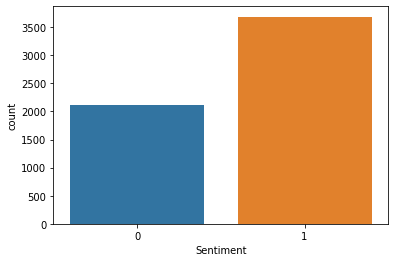

In [7]:
sns.countplot(stock_df['Sentiment'])

In [8]:
stock_df['Sentiment'].nunique()

2

WE have an UNbalanced dataset in our hands

PERFORMING DATA CLEANING(1.REMOVING PUNCTUATION)

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
Text='#$$##@Roshshs'
text_rem=[ char  for char in Text if char not in string.punctuation]
text_rem

['R', 'o', 's', 'h', 's', 'h', 's']

In [11]:
text_rem_comp=''.join(text_rem)
text_rem_comp

'Roshshs'

In [12]:
def remove_punc(message):
  test_punc_removed=[char for char in message if char not in string.punctuation]
  test_punc_removed_join=''.join(test_punc_removed)
  return test_punc_removed_join

we can apply a function to a column just by using apply(function_name)

In [13]:
#creating new column['Text_new] without punctuation 
stock_df['Text_new']=stock_df['Text'].apply(remove_punc)

In [14]:
stock_df

,Text,Sentiment,Text_new
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [15]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [16]:
stock_df['Text_new'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

PERFORMING DATA CLEANING(1.REMOVE STOPWORDS)

In [17]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Along with the already available stopwords you can add your custom stopwords using the 'extend' Keyword

In [18]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['https','from','subject','re','edu','use','will','aap','co','day','user','stock','today','week','year'])


In [19]:
def preprocess(text):
  result=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in stop_words and len(token)>=3:
      result.append(token)
  return result

In [20]:
stock_df['Text_new2']=stock_df['Text_new'].apply(preprocess)
stock_df

,Text,Sentiment,Text_new,Text_new2
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [21]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [22]:
stock_df['Text_new2'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

**Wordcloud** is a really powerful  way to vitualise
  important words ina corpus of documents

In [23]:
#we need to join the words in text_new2 and save it to text_new3
stock_df['Text_new3']=stock_df['Text_new2'].apply(lambda x:' '.join(x))

In [24]:
stock_df

,Text,Sentiment,Text_new,Text_new2,Text_new3
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [25]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=1000,width=1600,height=800).generate(' '.join(stock_df[stock_df['Sentiment']==1]['Text_new3']))
#max word is just an arbitrary number i choose

<Figure size 1440x1440 with 0 Axes>

Displaying the important Words that contribute to  positive sentiments

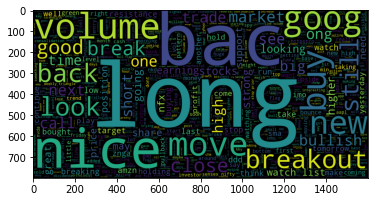

In [26]:
plt.imshow(wc)

Displaying the important Words that contribute to negative sentiments

In [27]:
wc1=WordCloud(max_words=1000,width=1600,height=800).generate(' '.join(stock_df[stock_df['Sentiment']==0]['Text_new3']))

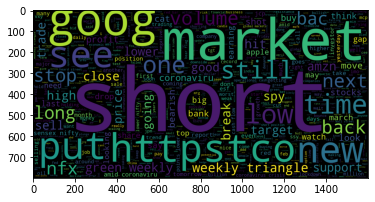

In [28]:
plt.imshow(wc1)

**Now lets visualise the cleaned dataset**

In [29]:
stock_df['Text_new3'][0]

'kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts'

In [30]:
nltk.download('punkt')
nltk.word_tokenize(stock_df['Text_new3'][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [31]:
#we now have to find   the max length sentence
maxlen=-1
for doc in stock_df['Text_new3']:
  tokens=nltk.word_tokenize(doc)
  if (len(tokens)>maxlen):
    maxlen=len(tokens)

    

In [32]:
maxlen
#max no. of words in any  document is 

20

In [33]:
t_length=[len(nltk.word_tokenize(x))  for x in stock_df['Text_new3']]
t_length[:10]

[14, 6, 7, 1, 0, 1, 8, 13, 8, 4]

In [34]:
fig=px.histogram(x=t_length,nbins=50)
fig.show()

Now lets prepare the data by performing tokenisation and padding

In [35]:
#tokeniser vectorises our text corpus
#tokenisation works turning each text into a sequence of integers
list_of_words=[]

for i in stock_df['Text_new2']:
  for j in i:
    list_of_words.append(j)#total words in the dataset

In [36]:
total_words=len(list_of_words)#total number of words including rep
total_words

45099

In [37]:
unique_words=len(list(set(list_of_words)))#total number of unique words

now lets split the data to train and test set

In [38]:
x=stock_df['Text_new2']
y=stock_df['Sentiment']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)


In [39]:
#now lets convert text data into integers
tokenizer=Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)

train_sequences=tokenizer.texts_to_sequences(x_train)
test_sequences=tokenizer.texts_to_sequences(x_test)

In [40]:
train_sequences

[[3621, 862, 762, 699, 700, 1104, 38, 8],
 [1298, 414, 270, 701, 72, 5, 243, 86],
 [1534,
  1535,
  863,
  1536,
  3622,
  2482,
  3623,
  62,
  1537,
  3624,
  114,
  3625,
  1538,
  3626],
 [386, 5, 2, 118, 91, 9],
 [78, 864, 1891],
 [387, 1105, 98, 970, 1539, 7, 41],
 [6, 1892, 2483, 1893, 25],
 [167, 3627, 1299, 763, 114, 865, 39, 3, 114, 1894, 70, 1540, 3628, 2484],
 [1895, 153, 1541, 702, 764, 3629, 25, 388, 1541, 1896, 1897, 126],
 [204, 971, 1542, 3630, 2485, 3631, 3632, 11, 135, 1543],
 [115, 236, 3633, 389, 1],
 [2486, 140, 363, 2487, 187, 1898, 3634],
 [83, 549, 1106, 1107, 141, 550, 1899, 866, 154, 2488, 3635, 3636],
 [606, 867, 972, 3637, 324, 650, 244, 301, 1900, 415, 1300, 3638, 3639],
 [249, 507, 435],
 [344, 868, 607, 142],
 [1901, 16, 1544, 188, 3640, 21, 271],
 [3641, 3642, 1108, 109, 551, 2489, 17, 13, 26],
 [2490, 11, 250, 38, 5, 2],
 [10, 2491, 9, 121],
 [37, 34, 1, 345, 118, 42, 2492, 869, 18, 703, 436, 704],
 [10, 1301],
 [3643, 475, 3644, 1302, 3645, 3646, 3647

In [41]:
#i have documents having 3 and 4 words,now here padding is required
padded_train=pad_sequences(train_sequences,maxlen=29)
padded_test=pad_sequences(test_sequences,maxlen=29)


In [42]:
for i,doc in enumerate(padded_train[:3]):
  print('the padded encoding for document:',i+1,'is',doc)

the padded encoding for document: 1 is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 3621  862  762  699  700 1104   38
    8]
the padded encoding for document: 2 is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 1298  414  270  701   72    5  243
   86]
the padded encoding for document: 3 is [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1534 1535  863 1536 3622 2482 3623   62 1537 3624  114 3625 1538
 3626]


In [43]:
y_train_cat=to_categorical(y_train,2)
y_test_cat=to_categorical(y_test,2)

In [44]:
y_train_cat.shape#we need two dimension for lstm network(2 neurons)

(5211, 2)

In [45]:
model=Sequential()
model.add(Embedding(unique_words,output_dim=512))#512 is arbitrary
model.add(LSTM(256))#256 units
model.add(Dense(128,activation='relu'))
#to improve generalisation property of model we use Dropout
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(padded_train,y_train_cat,batch_size=32,validation_split=0.2,epochs=2)


Epoch 1/2
131/131 [==============================] - 46s 353ms/step - loss: 0.5728 - acc: 0.7020 - val_loss: 0.5375 - val_acc: 0.7315
Epoch 2/2
131/131 [==============================] - 41s 312ms/step - loss: 0.2686 - acc: 0.8911 - val_loss: 0.5803 - val_acc: 0.7325


In [47]:
pred=model.predict(padded_test)

In [48]:

pred

array([[0.02097562, 0.9790244 ],
       [0.15725866, 0.8427414 ],
       [0.8652872 , 0.13471283],
       ...,
       [0.01529045, 0.98470956],
       [0.9337032 , 0.06629676],
       [0.00132576, 0.9986743 ]], dtype=float32)

In [54]:
prediction=[]#predicting 
for i in pred:
  prediction.append(np.argmax(i))


In [55]:
prediction

[1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [56]:
original=[]
for i in y_test_cat:
  original.append(np.argmax(i))

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(original,prediction)
accuracy

0.743103448275862

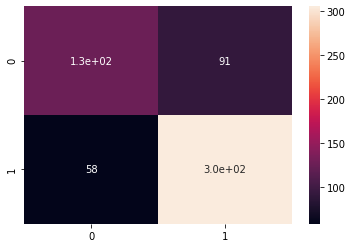

In [58]:
cm=confusion_matrix(original,prediction)
sns.heatmap(cm,annot=True)


Only 149 test samples are wrongly classified which is great 
And if we do Hyperparamter Tuning and more inDepth preprocessing we will get a better result


code by:Roshan PK

REFERENCE:Dr. Ryan Ahmed, Ph.D., MBA
https://www.udemy.com/course/ml-and-python-in-finance-real-cases-and-practical-solutions/